# Binning in 1D


The task is to generate parameters of the Gaussian mixture model that best describes samples from an intractable target distributions. Target distribution samples are generated by pass unit Gaussian samples through a small multi-layer perceptron transformation. 


### Table of contents
1. [Run LLM-innovation loop](#loop)
2. [Visualise KDE instances](#visualise)

In [1]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt


import template

<a id="1D"></a>
## 1. Example 1D challenge target distribution samples

In [2]:
seed = 1234
rng_params = np.random.default_rng(seed)
rng_samps = np.random.default_rng(seed + 1)

num_samples = 2 ** 20
z = rng_samps.normal(size=(num_samples, 1))

x = template.generate_samples(rng_params, z)

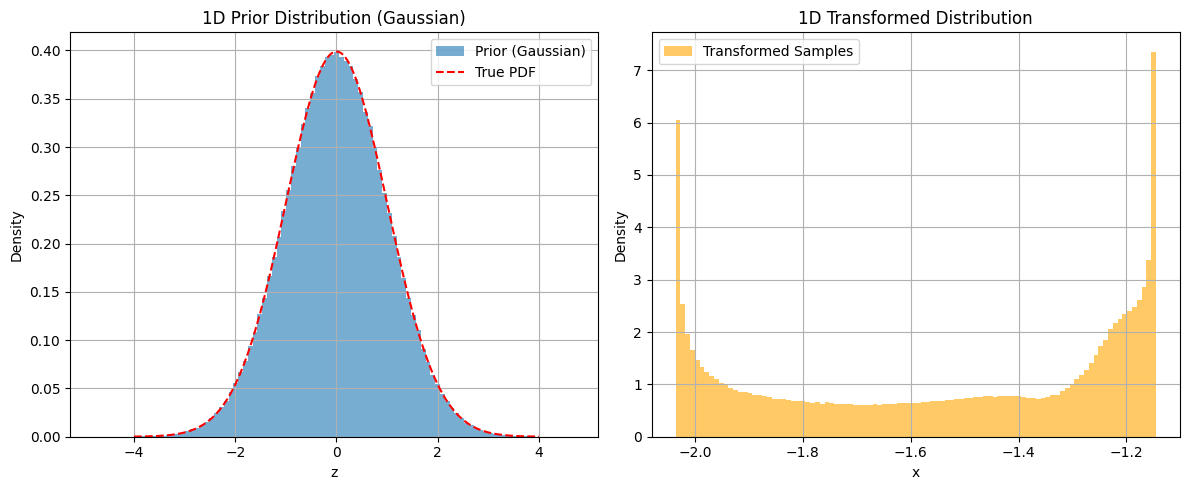

In [3]:
# Plot
plt.figure(figsize=(12, 5))

# Prior
plt.subplot(1, 2, 1)
plt.hist(z, bins=100, density=True, alpha=0.6, label="Prior (Gaussian)")
x_vals = np.linspace(-4, 4, 200)
plt.plot(x_vals, norm.pdf(x_vals), 'r--', label="True PDF")
plt.title("1D Prior Distribution (Gaussian)")
plt.xlabel("z")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# Transformed
plt.subplot(1, 2, 2)
plt.hist(x, bins=100, density=True, alpha=0.6, label="Transformed Samples", color="orange")
plt.title("1D Transformed Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()